# Intorduction
The dataset for this competition (both train and test) was generated from a deep learning model trained on the [California housing dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html).
Feature distributions are close to, but not exactly the same, as the original.

This dataset was derived from the 1990 U.S. census, using one row per census block group.
The target variable is the median house value for California districts, expressed in hundreds of thousands of dollars ($100,000).

Data ranges, and data types for each feature in the data set are as follows, their names are pretty self explanitory:
* `MedInc` - Median income in block group
* `HouseAge` - Median house age in block group
* `AveRooms` - Average number of rooms per household
* `AveBedrms` - Average number of bedrooms per household
* `Population` - Block group population
* `AveOccup` - Average number of household members
* `Latitude` - Block group latitude
* `Longitude` - Block group longitude

The evaluation metric is going to be the standard Root Mean Squared Error (RMSE)!

# Import Packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from pathlib import Path
import matplotlib.pyplot as plt

from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import fetch_california_housing

# EDA

In [2]:


train_set = pd.read_csv(r"D:\source\repos\Kaggle_Tabular_Playground_Series-ML\Jan-2023\data\train.csv")
test_set = pd.read_csv(r"D:\source\repos\Kaggle_Tabular_Playground_Series-ML\Jan-2023\data\test.csv")
sample_sub = pd.read_csv(r"D:\source\repos\Kaggle_Tabular_Playground_Series-ML\Jan-2023\data\sample_submission.csv")

In [3]:
train_set.head()

,id,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,0,2.3859,15.0,3.827160,1.112100,1280.0,2.486989,34.60,-120.12,0.980
1,1,3.7188,17.0,6.013373,1.054217,1504.0,3.813084,38.69,-121.22,0.946
2,2,4.7750,27.0,6.535604,1.103175,1061.0,2.464602,34.71,-120.45,1.576
3,3,2.4138,16.0,3.350203,0.965432,1255.0,2.089286,32.66,-117.09,1.336
4,4,3.7500,52.0,4.284404,1.069246,1793.0,1.604790,37.80,-122.41,4.500


In [4]:
print('train_set shape: ', train_set.shape)
print('test_set shape: ', test_set.shape)

train_set shape:  (37137, 10)
test_set shape:  (24759, 9)


In [5]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37137 entries, 0 to 37136
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           37137 non-null  int64  
 1   MedInc       37137 non-null  float64
 2   HouseAge     37137 non-null  float64
 3   AveRooms     37137 non-null  float64
 4   AveBedrms    37137 non-null  float64
 5   Population   37137 non-null  float64
 6   AveOccup     37137 non-null  float64
 7   Latitude     37137 non-null  float64
 8   Longitude    37137 non-null  float64
 9   MedHouseVal  37137 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 2.8 MB


In [6]:
train_set.describe()

,id,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,37137.00000,37137.000000,37137.000000,37137.000000,37137.000000,37137.000000,37137.000000,37137.000000,37137.000000,37137.000000
mean,18568.00000,3.851029,26.057005,5.163124,1.062204,1660.778919,2.831243,35.570030,-119.554329,2.079751
std,10720.67281,1.803167,12.158221,1.206242,0.096490,1302.469608,2.702413,2.083179,1.974028,1.158571
min,0.00000,0.499900,2.000000,0.851064,0.500000,3.000000,0.950000,32.550000,-124.350000,0.149990
25%,9284.00000,2.602300,17.000000,4.357522,1.020305,952.000000,2.394495,33.930000,-121.800000,1.208000
50%,18568.00000,3.515600,25.000000,5.068611,1.054545,1383.000000,2.744828,34.190000,-118.450000,1.808000
75%,27852.00000,4.699700,35.000000,5.858597,1.088825,1856.000000,3.125313,37.700000,-118.020000,2.660000
max,37136.00000,15.000100,52.000000,28.837607,5.873181,35682.000000,502.990610,41.950000,-114.550000,5.000010


## Missing Data

In [7]:
total = train_set.isnull().sum().sort_values(ascending=False)
percent = (train_set.isnull().sum()/train_set.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
id,0,0.0
MedInc,0,0.0
HouseAge,0,0.0
AveRooms,0,0.0
AveBedrms,0,0.0
Population,0,0.0
AveOccup,0,0.0
Latitude,0,0.0
Longitude,0,0.0
MedHouseVal,0,0.0


## Data visualisation

In [8]:
features = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
target = ['MedHouseVal']

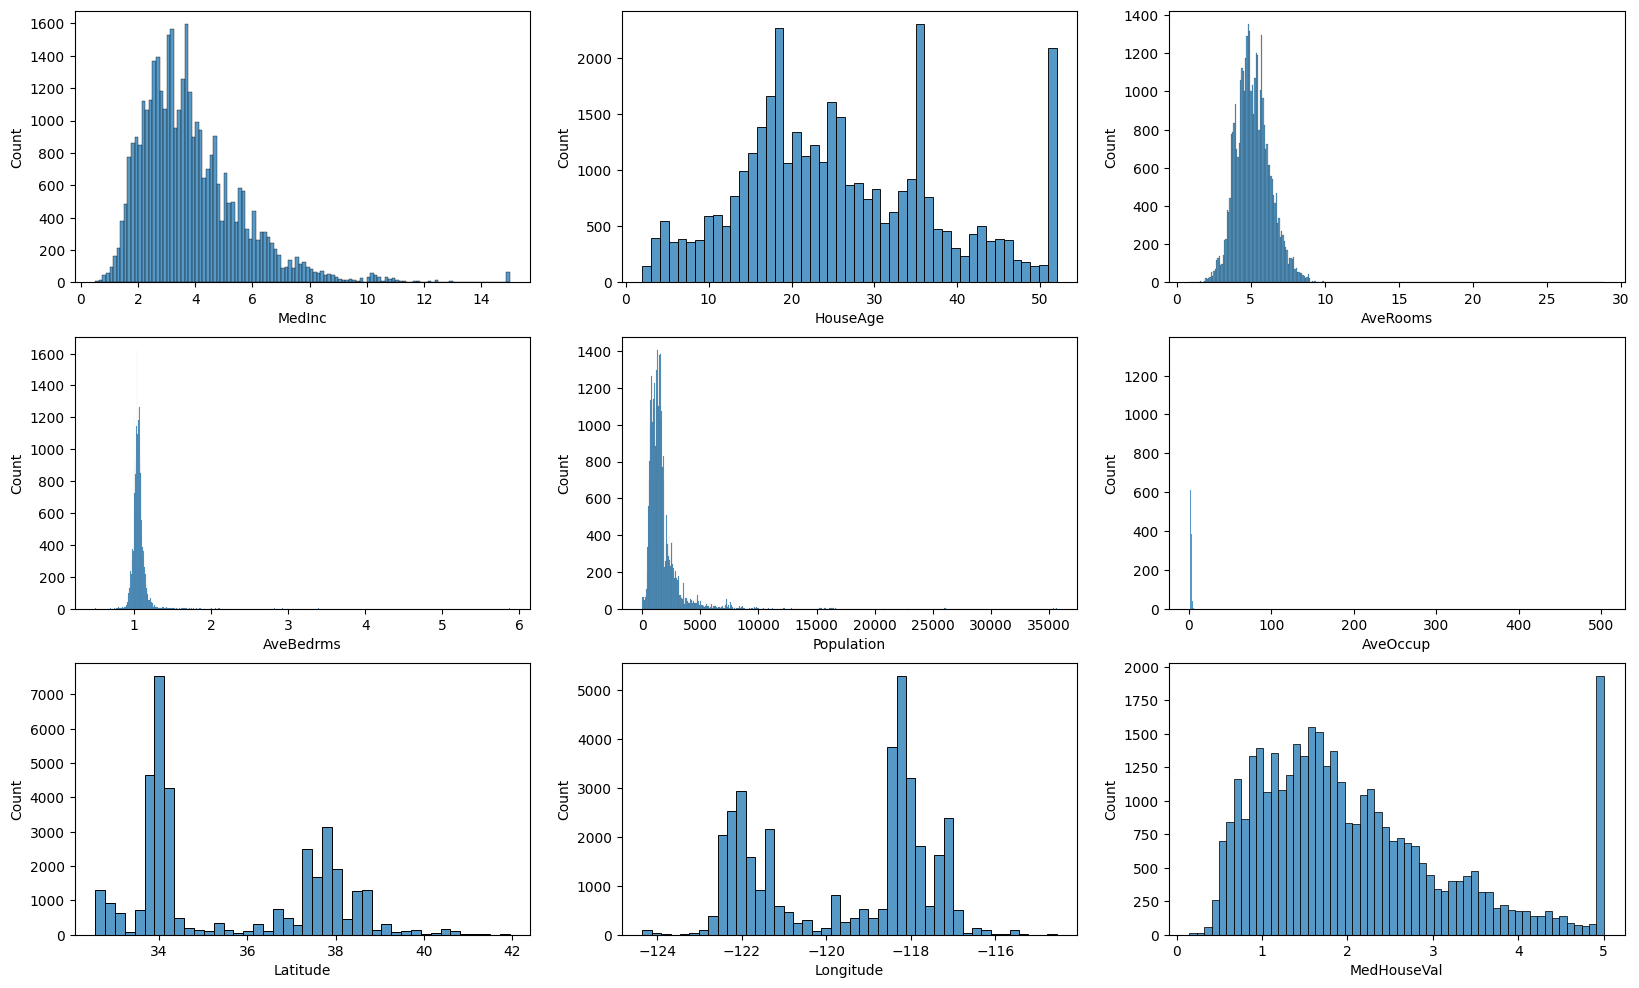

In [9]:
fig, axes = plt.subplots(3,3, figsize=(20, 12))
for i, j in zip(features+target, axes.flatten()):
    sns.histplot(train_set[i], ax=j)
plt.show()

### **Relationship with variables**

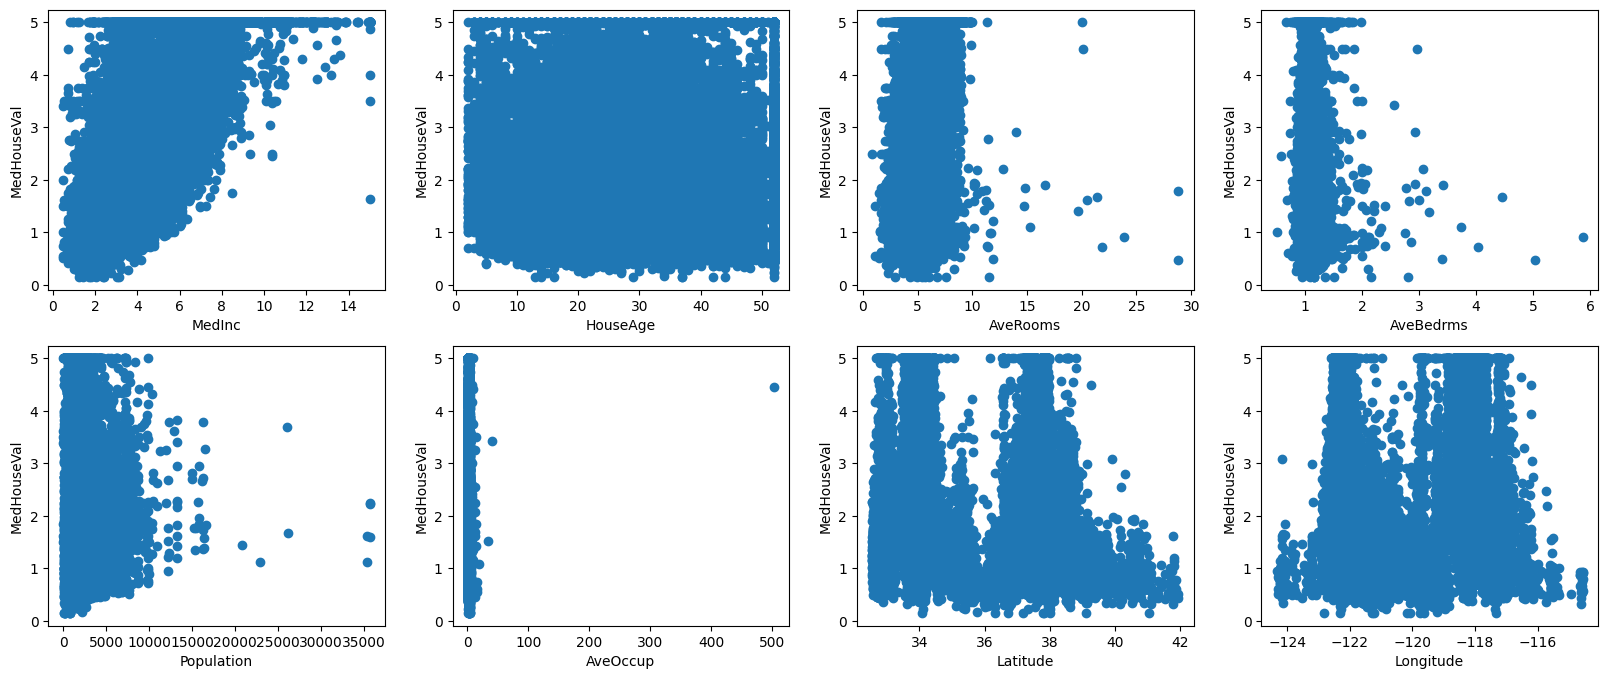

In [10]:
fig, axs = plt.subplots(2,4, figsize=(20, 8))
for i, j in enumerate(features):
    var = j
    plt.subplot(2,4,i+1)
    data = pd.concat([train_set['MedHouseVal'], train_set[var]], axis=1)
    plt.scatter(x=data[var], y=data['MedHouseVal'])
    plt.xlabel(j)
    plt.ylabel('MedHouseVal')
plt.show()

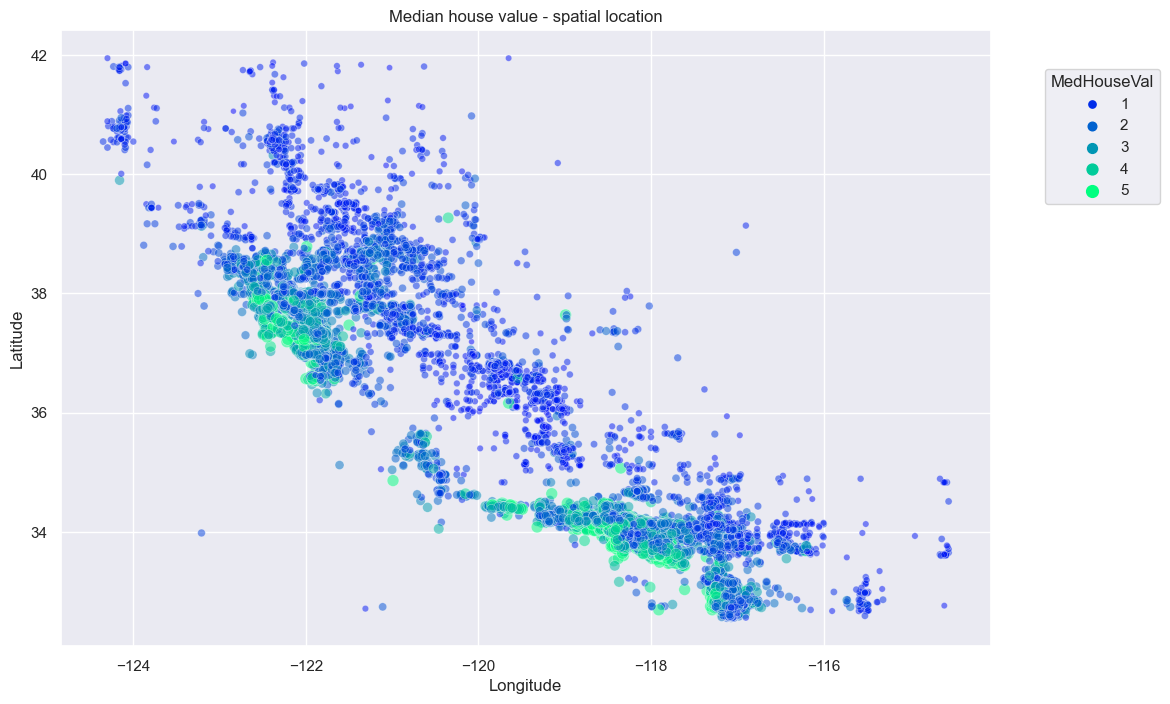

In [11]:
plt.figure(figsize = (12, 8))

sns.set_theme(style='darkgrid')
sns.scatterplot(data = train_set, x = "Longitude", y = "Latitude",
                size = "MedHouseVal", hue = "MedHouseVal",
                palette = "winter", alpha = 0.5)

plt.legend(title = "MedHouseVal", bbox_to_anchor = (1.05, 0.95), loc = 2)
plt.title("Median house value - spatial location")
plt.show()

### Correlation matrix (heatmap style)

<AxesSubplot: >

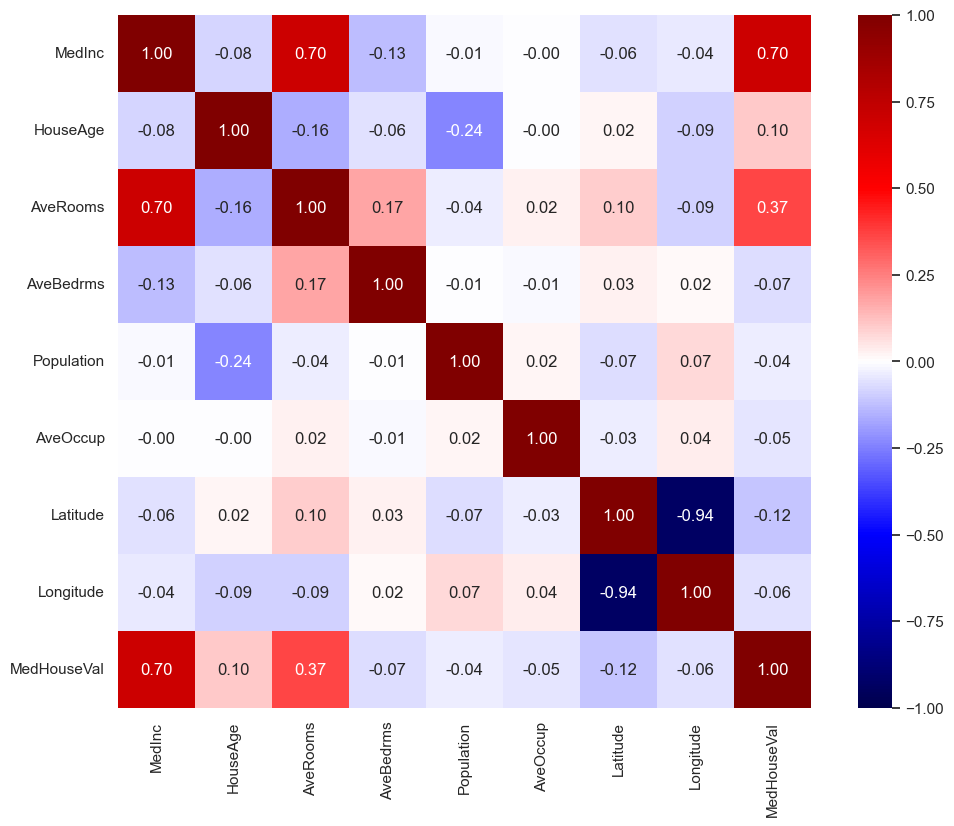

In [12]:
corrmat = train_set[features+target].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, square=True, annot=True, fmt='.2f', cmap='seismic', vmin=-1, vmax=1)

### Original Data

In [13]:
original = fetch_california_housing()
assert original['feature_names'] == list(features)
assert original['target_names'][0] == target[0]

df_original = pd.DataFrame(original['data'], columns=features)
df_original[target[0]] = original['target']

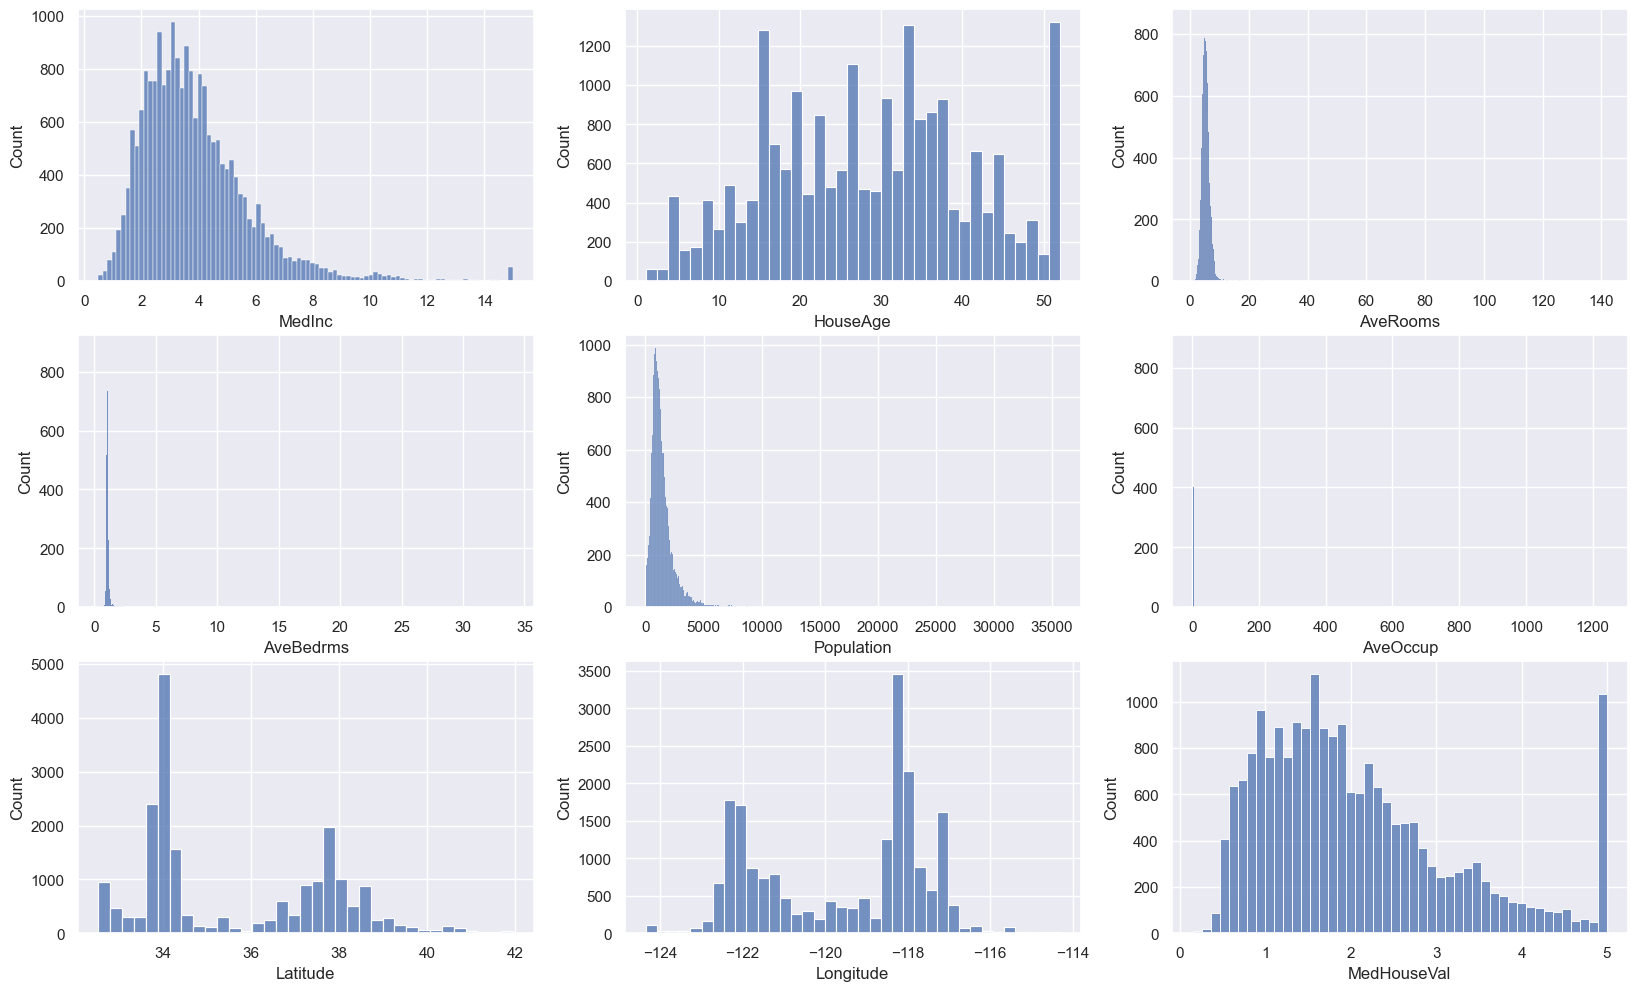

In [14]:
fig, axes = plt.subplots(3,3, figsize=(20, 12))
for i, j in zip(features+target, axes.flatten()):
    sns.histplot(df_original[i], ax=j)
plt.show()

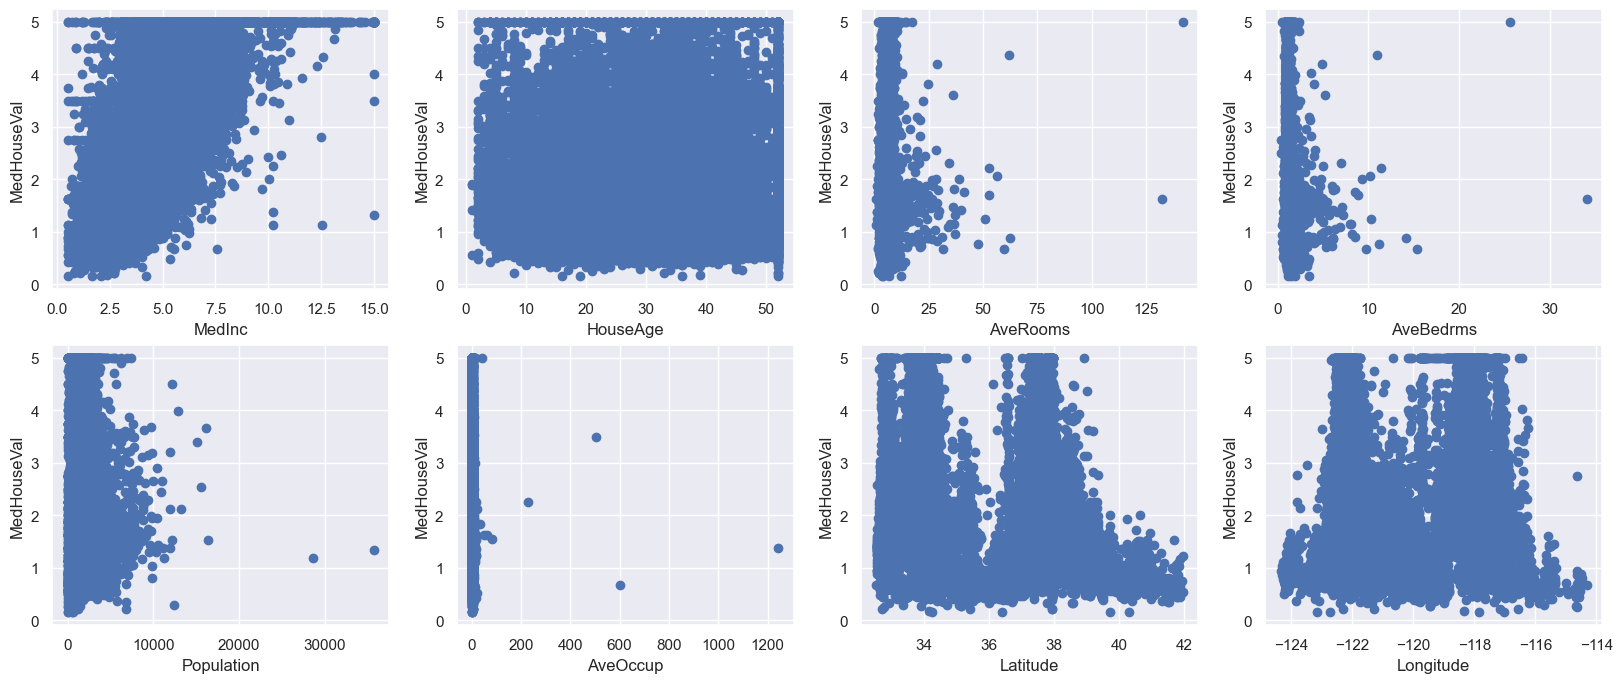

In [15]:
fig, axs = plt.subplots(2,4, figsize=(20, 8))
for i, j in enumerate(features):
    var = j
    plt.subplot(2,4,i+1)
    data = pd.concat([df_original['MedHouseVal'], df_original[var]], axis=1)
    plt.scatter(x=data[var], y=data['MedHouseVal'])
    plt.xlabel(j)
    plt.ylabel('MedHouseVal')
plt.show()

# Train Model

In [19]:
import lightgbm as lgbm
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm.sklearn import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor

In [20]:
scaler = MinMaxScaler().fit(train_set[features])
train_scaled = scaler.transform(train_set[features])
test_scaled = scaler.transform(test_set[features])

In [21]:
kf = KFold(n_splits=5, random_state=1, shuffle=True)
clfs = []
err = []

for i, (train_index, val_index) in enumerate(kf.split(train_set)):
    X_train, X_val = train_scaled[train_index, :], train_scaled[val_index, :]
    y_train, y_val = train_set['MedHouseVal'][train_index], train_set['MedHouseVal'][val_index]
    
    clf = XGBRegressor(n_estimators=200,
                       max_depth=4,
                       colsample_bytree=0.9,
                       subsample=1,
                       reg_lambda=20,
                       tree_method='gpu_hist',
                       seed=1)
    clf.fit(X_train, y_train)
    preds = clf.predict(X_val)
    
    rmse = mean_squared_error(y_val, preds, squared=False)
    err.append(rmse)
    clfs.append(clf)
    print(f'RMSE on fold {i}: {rmse}')

print(f'Average RMSE (five fold): {sum(err)/5}')

RMSE on fold 0: 0.5852816472791295
RMSE on fold 1: 0.5638946486293417
RMSE on fold 2: 0.5709687315831392
RMSE on fold 3: 0.5629519950267582
RMSE on fold 4: 0.5638308949310845
Average RMSE (five fold): 0.5693855834898907


In [48]:
kf = KFold(n_splits=5, random_state=1, shuffle=True)
err = []
for i, (train_index, val_index) in enumerate(kf.split(train_set)):
    scaler = MinMaxScaler().fit(train_set[features])
    train_scaled = scaler.transform(train_set[features])
    test_scaled = scaler.transform(test_set[features])
    X_train, X_val = train_scaled[train_index, :], train_scaled[val_index, :]
    y_train, y_val = train_set['MedHouseVal'][train_index], train_set['MedHouseVal'][val_index]
    rmse = mean_squared_error(y_val, preds, squared=False)
    err.append(rmse)
print(f'Average RMSE (five fold): {sum(err)/5}')

ValueError: Found input variables with inconsistent numbers of samples: [7428, 24759]

## Boost with original data

In [22]:
df_original['is_generated'] = 0
train_set['is_generated'] = 1
test_set['is_generated'] = 1

In [23]:
def rt_crds(df): 
    
    df['rot_15_x'] = (np.cos(np.radians(15)) * df['Longitude']) + \
                      (np.sin(np.radians(15)) * df['Latitude'])
    
    df['rot_15_y'] = (np.cos(np.radians(15)) * df['Latitude']) - \
                      (np.sin(np.radians(15)) * df['Longitude'])
    
    df['rot_30_x'] = (np.cos(np.radians(30)) * df['Longitude']) + \
                      (np.sin(np.radians(30)) * df['Latitude'])
    
    df['rot_30_y'] = (np.cos(np.radians(30)) * df['Latitude']) - \
                      (np.sin(np.radians(30)) * df['Longitude'])
    
    df['rot_45_x'] = (np.cos(np.radians(45)) * df['Longitude']) + \
                      (np.sin(np.radians(45)) * df['Latitude'])
    
    df['rot_45_y'] = (np.cos(np.radians(45)) * df['Latitude']) - \
                      (np.sin(np.radians(45)) * df['Longitude'])

    return df

df_original = rt_crds(df_original)
train_set = rt_crds(train_set)
test_set = rt_crds(test_set)

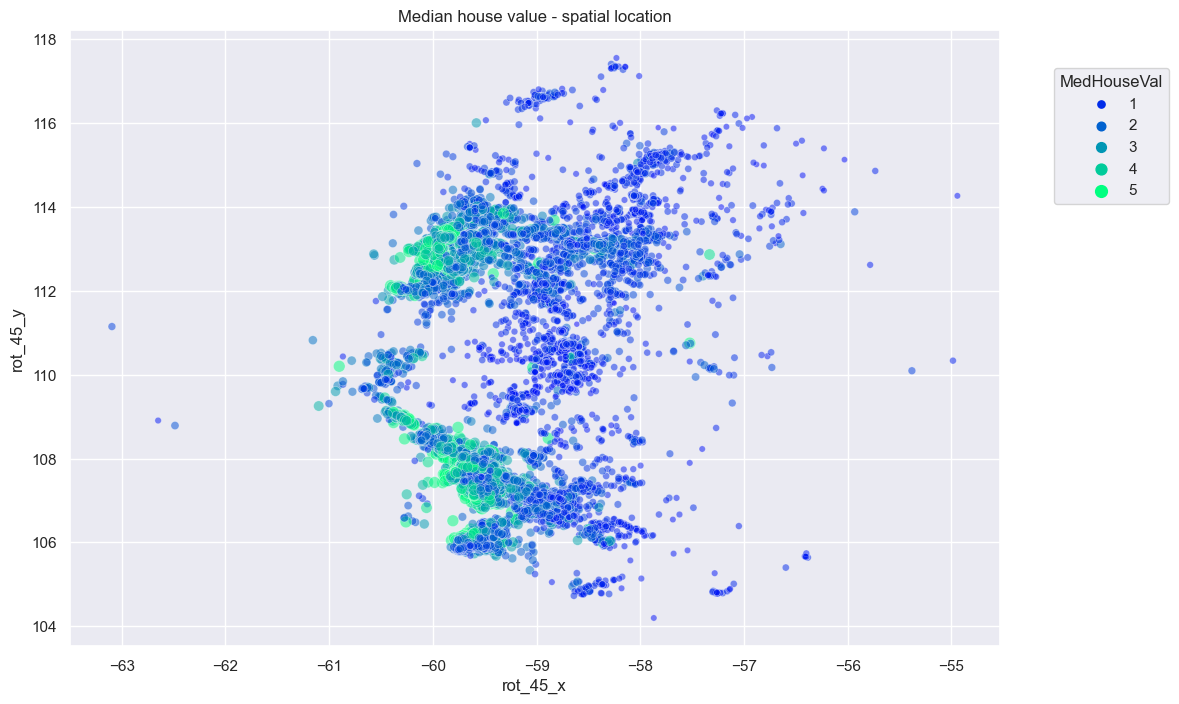

In [24]:
plt.figure(figsize = (12, 8))

sns.set_theme(style='darkgrid')
sns.scatterplot(data = train_set, x = "rot_45_x", y = "rot_45_y",
                size = "MedHouseVal", hue = "MedHouseVal",
                palette = "winter", alpha = 0.5)

plt.legend(title = "MedHouseVal", bbox_to_anchor = (1.05, 0.95), loc = 2)
plt.title("Median house value - spatial location")
plt.show()

In [25]:
train_concat = pd.concat([train_set.drop('id', axis=1), df_original]).reset_index(drop=True)

In [26]:
features = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 
            'is_generated', 'rot_15_x', 'rot_15_y', 'rot_30_x', 'rot_30_y', 'rot_45_x', 'rot_45_y']
target = ['MedHouseVal']

In [27]:
scaler = MinMaxScaler().fit(train_concat[features])
train_scaled = scaler.transform(train_concat[features])
test_scaled = scaler.transform(test_set[features])

In [28]:
import warnings
warnings.filterwarnings('ignore')

kf = KFold(n_splits=10, random_state=1, shuffle=True)
clfs = []
err = []

for i, (train_index, val_index) in enumerate(kf.split(train_concat)):
    X_train, X_val = train_scaled[train_index, :], train_scaled[val_index, :]
    y_train, y_val = train_concat['MedHouseVal'][train_index], train_concat['MedHouseVal'][val_index]
    
    clf = XGBRegressor(n_estimators=20000,
                       max_depth=9,
                       learning_rate=0.01,
                       colsample_bytree=0.66,
                       subsample=0.9,
                       min_child_weight=22,
                       reg_lambda=16,
                       tree_method='gpu_hist',
                       seed=1)
    
    clf.fit(X_train, y_train,
            early_stopping_rounds=100, 
            eval_set=[(X_val, y_val)], 
            verbose=1000)
    
    preds = clf.predict(X_val)
    
    rmse = mean_squared_error(y_val, preds, squared=False)
    err.append(rmse)
    clfs.append(clf)
    print(f'RMSE on fold {i}: {rmse}')
    print('-'*50)

print(f'Average RMSE (five fold): {sum(err)/10}')

[0]	validation_0-rmse:1.96543
[1000]	validation_0-rmse:0.52032
[2000]	validation_0-rmse:0.51807
[2004]	validation_0-rmse:0.51807
RMSE on fold 0: 0.5180395294316563
--------------------------------------------------
[0]	validation_0-rmse:1.92491
[1000]	validation_0-rmse:0.49557
[2000]	validation_0-rmse:0.49262
[2398]	validation_0-rmse:0.49241
RMSE on fold 1: 0.49235857995797094
--------------------------------------------------
[0]	validation_0-rmse:1.95202
[1000]	validation_0-rmse:0.53252
[2000]	validation_0-rmse:0.52953
[2280]	validation_0-rmse:0.52943
RMSE on fold 2: 0.5293753403522565
--------------------------------------------------
[0]	validation_0-rmse:1.92004
[1000]	validation_0-rmse:0.52035
[2000]	validation_0-rmse:0.51765
[2553]	validation_0-rmse:0.51729
RMSE on fold 3: 0.5172727843797761
--------------------------------------------------
[0]	validation_0-rmse:1.93277
[1000]	validation_0-rmse:0.50468
[2000]	validation_0-rmse:0.50096
[2346]	validation_0-rmse:0.50076
RMSE on fo

In [29]:
err = []

for i, (train_index, val_index) in enumerate(kf.split(train_concat)):
    X_train, X_val = train_scaled[train_index, :], train_scaled[val_index, :]
    y_train, y_val = train_concat['MedHouseVal'][train_index], train_concat['MedHouseVal'][val_index]
    
    clf = lgbm.LGBMRegressor(learning_rate=0.01,
                             max_depth=9,
                             num_leaves=90,
                             colsample_bytree=0.8,
                             subsample=0.9,
                             subsample_freq=5,
                             min_child_samples=36,
                             reg_lambda=28,
                             n_estimators=20000,
                             metric='rmse',
                             random_state=1)
    
    clf.fit(X_train, y_train, eval_set=[(X_val, y_val)], callbacks=[lgbm.early_stopping(100, verbose=True)])
    preds = clf.predict(X_val)
    
    rmse = mean_squared_error(y_val, preds, squared=False)
    err.append(rmse)
    clfs.append(clf)
    print(f'RMSE on fold {i}: {rmse}')
    print('-'*50)

print(f'Average RMSE (five fold): {sum(err)/10}')

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[2528]	valid_0's rmse: 0.519555
RMSE on fold 0: 0.5195551936135977
--------------------------------------------------
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[3163]	valid_0's rmse: 0.493857
RMSE on fold 1: 0.493856980566392
--------------------------------------------------
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[2648]	valid_0's rmse: 0.530694
RMSE on fold 2: 0.5306939952293735
--------------------------------------------------
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[2785]	valid_0's rmse: 0.51924
RMSE on fold 3: 0.5192404034877695
--------------------------------------------------
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[2986]	valid_0's rmse: 0.503311
RMSE on fold 

In [30]:
err = []

for i, (train_index, val_index) in enumerate(kf.split(train_concat)):
    X_train, X_val = train_scaled[train_index, :], train_scaled[val_index, :]
    y_train, y_val = train_concat['MedHouseVal'][train_index], train_concat['MedHouseVal'][val_index]
    
    clf = CatBoostRegressor(iterations=20000,
                            depth=9,
                            learning_rate=0.01,
                            rsm=0.88,
                            subsample=0.795,
                            min_data_in_leaf=35,
                            l2_leaf_reg=8,
                            random_strength=0.63,
                            bootstrap_type='Bernoulli',
                            grow_policy='SymmetricTree',
                            loss_function='RMSE',
                            eval_metric='RMSE',
                            task_type="CPU",
                            random_state=1)
    
    clf.fit(X_train, y_train, eval_set=(X_val, y_val), early_stopping_rounds=100, verbose=1000)
    preds = clf.predict(X_val)
    
    rmse = mean_squared_error(y_val, preds, squared=False)
    err.append(rmse)
    clfs.append(clf)
    print(f'RMSE on fold {i}: {rmse}')
    print('-'*50)

print(f'Average RMSE (five fold): {sum(err)/10}')

0:	learn: 1.1471204	test: 1.1688215	best: 1.1688215 (0)	total: 163ms	remaining: 54m 22s
1000:	learn: 0.5163908	test: 0.5435056	best: 0.5435056 (1000)	total: 16.1s	remaining: 5m 5s
2000:	learn: 0.4863556	test: 0.5312478	best: 0.5312478 (2000)	total: 32s	remaining: 4m 48s
3000:	learn: 0.4653654	test: 0.5264570	best: 0.5264538 (2998)	total: 47.9s	remaining: 4m 31s
4000:	learn: 0.4478479	test: 0.5237564	best: 0.5237564 (4000)	total: 1m 3s	remaining: 4m 15s
5000:	learn: 0.4323761	test: 0.5222343	best: 0.5222343 (5000)	total: 1m 20s	remaining: 4m
6000:	learn: 0.4184433	test: 0.5213027	best: 0.5213002 (5995)	total: 1m 36s	remaining: 3m 44s
7000:	learn: 0.4057360	test: 0.5207870	best: 0.5207705 (6968)	total: 1m 52s	remaining: 3m 28s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.520576811
bestIteration = 7461

Shrink model to first 7462 iterations.
RMSE on fold 0: 0.5205768106314296
--------------------------------------------------
0:	learn: 1.1507268	test: 1.1362031	bes

## feature importance

----------------------------XGBoost----------------------------


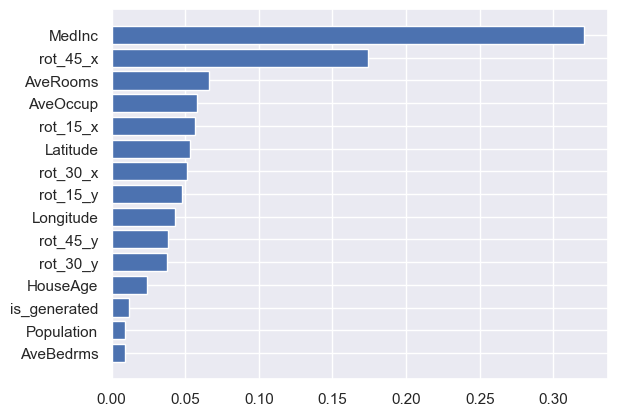

In [31]:
imp = np.zeros(15)
for clf in clfs[:10]:
    imp+= clf.feature_importances_
    
print('----------------------------XGBoost----------------------------')
plt.barh([features[i] for i in np.argsort(imp/10)], sorted(imp/10))
plt.show()

----------------------------LGBM----------------------------


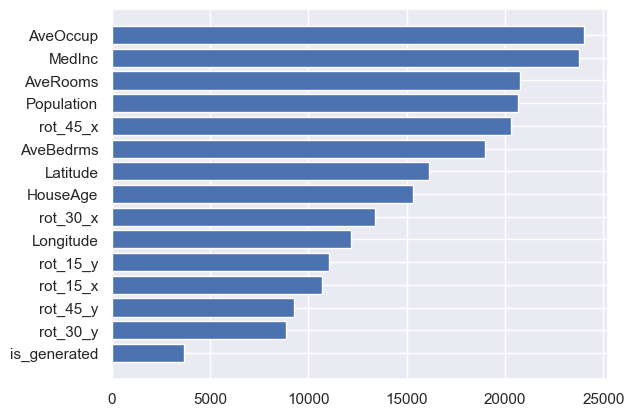

In [32]:
imp = np.zeros(15)
for clf in clfs[10:20]:
    imp+= clf.feature_importances_
    
print('----------------------------LGBM----------------------------')
plt.barh([features[i] for i in np.argsort(imp/10)], sorted(imp/10))
plt.show()

----------------------------CatBoost----------------------------


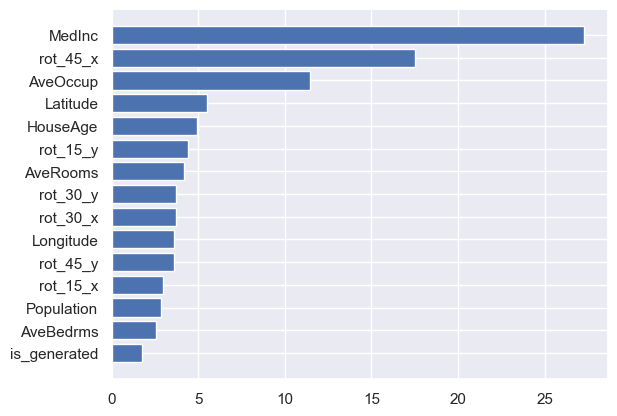

In [33]:
imp = np.zeros(15)
for clf in clfs[20:]:
    imp+= clf.feature_importances_
    
print('----------------------------CatBoost----------------------------')
plt.barh([features[i] for i in np.argsort(imp/10)], sorted(imp/10))
plt.show()

# Making submission

In [34]:
test_preds1 = []
test_preds2 = []
test_preds3 = []

for clf in clfs[:10]:
    preds = clf.predict(test_scaled)
    test_preds1.append(preds)
    
for clf in clfs[10:20]:
    preds = clf.predict(test_scaled)
    test_preds2.append(preds)
    
for clf in clfs[20:]:
    preds = clf.predict(test_scaled)
    test_preds3.append(preds)

In [35]:
test_preds1 = np.stack(test_preds1).mean(0)
test_preds2 = np.stack(test_preds2).mean(0)
test_preds3 = np.stack(test_preds3).mean(0)

In [42]:
attempts = [
    [0.2, 0.6, 0.2],
    [0.6, 0.2, 0.6],
    [0.3, 0.3, 0.4],
    [0.3, 0.4, 0.3],
    [0.5, 0.3, 0.2]
]

In [44]:
attempts = [
    [0.6, 0.3, 0.1],
    [0.7, 0.2, 0.1],
    [0.7, 0.1, 0.2],
    [0.6, 0.2, 0.2],
    [0.6, 0.1, 0.3]
]

In [49]:
attempts = [
    [0.6, 0.25, 0.15],
    [0.6, 0.2, 0.2],
    [0.6, 0.15, 0.25],
    [0.65, 0.15, 0.2],
    [0.65, 0.1, 0.25]
]

In [50]:
for i, row in enumerate(attempts):
    test_preds = test_preds1*row[0] + test_preds2*row[1] + test_preds3*row[2]
    submission = pd.DataFrame(data={'id': test_set.id, 'MedHouseVal': test_preds})
    submission.to_csv(f'submission{i}.csv', index=False)

In [52]:
test_preds = test_preds1*0.45 + test_preds2*0.35 + test_preds3*0.2
submission = pd.DataFrame(data={'id': test_set.id, 'MedHouseVal': test_preds})
submission.to_csv(f'submission{i}.csv', index=False)

In [37]:
submission = pd.DataFrame(data={'id': test_set.id, 'MedHouseVal': test_preds})
submission.head()

,id,MedHouseVal
0,37137,0.647783
1,37138,1.038010
2,37139,4.045299
3,37140,3.260007
4,37141,2.430855


In [38]:
submission.to_csv('submission.csv', index=False)

**If you found this notebook useful, please upvote!**  
**Thank you!**🙏